In [33]:
import pandas as pd
from sklearn.datasets import make_moons

In [34]:
X, Y = make_moons(n_samples=200, noise=0.2,
                 random_state=123)
X[:3,:]

array([[-0.07796241,  1.06293368],
       [ 0.20230378, -0.06772446],
       [ 0.59980849,  0.67237698]])

In [35]:
Y[:3]

array([0, 1, 0], dtype=int64)

In [36]:
df_moon = pd.concat([pd.DataFrame(X, columns = ["x", "y"]),
                    pd.Series(Y)], axis = 1)
df_moon.head(2)

,x,y,0
0,-0.077962,1.062934,0
1,0.202304,-0.067724,1


<AxesSubplot:xlabel='x', ylabel='y'>

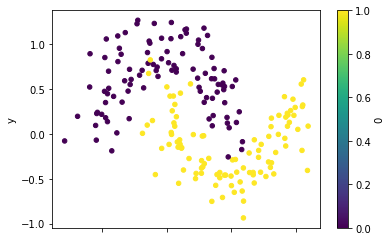

In [37]:
df_moon.plot.scatter(x="x", y="y",
                    c=0 # 0 변수에 color 부여
                     , colormap="viridis")

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn. metrics import accuracy_score

In [39]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size = 0.3)

In [54]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X = X_tr, y = Y_tr)

KNeighborsClassifier(n_neighbors=10)

In [55]:
y_pred = model.predict(X_te)
accuracy_score(y_pred, Y_te)

0.9833333333333333

In [56]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [58]:
df = pd.read_csv("./data/classification_data_01.csv")
df.head(2)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [60]:
df["Class"].unique()

array([0, 1], dtype=int64)

In [65]:
X = df.drop("Class", axis = 1)
X.head(2)

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [66]:
y = df["Class"]

In [67]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X, y, test_size = 0.3)

In [68]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_tr, Y_tr)
y_pred = clf.predict(X_te)

In [69]:
confusion_matrix(Y_te, y_pred)

array([[225,   5],
       [  1, 181]], dtype=int64)

In [70]:
pd.crosstab(Y_te, y_pred)

col_0,0,1
Class,,
0,225,5
1,1,181


In [74]:
clf.score(X_tr, Y_tr)

1.0

In [72]:
clf.score(X_te, Y_te)

0.9854368932038835